<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer: 979 rows and 6 columns
movies.info

<bound method DataFrame.info of      star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2         

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer: close to 121 minutes
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer: shortest 64 minutes, longest 242 minutes
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

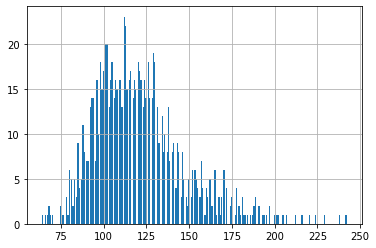

In [8]:
# Answer:
movies.duration.hist(bins = 242);

#### Use a box plot to display that same data.

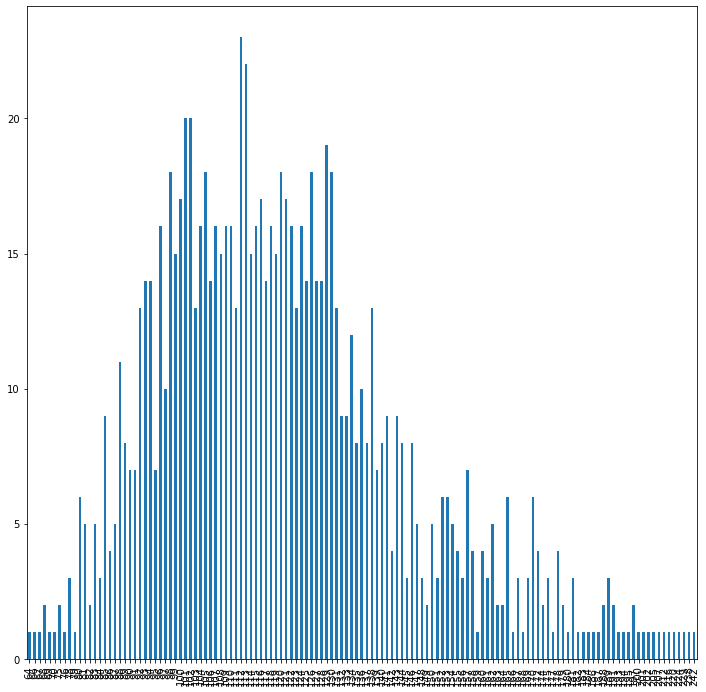

In [9]:
# Answer:
movies.duration.value_counts().sort_index().plot(kind='bar', figsize=(12,12));

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

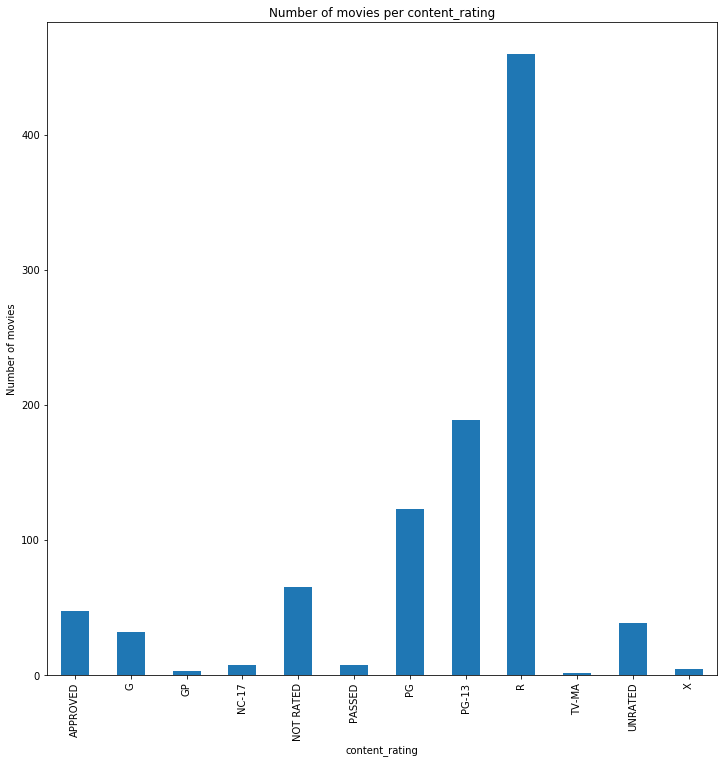

In [11]:
# Answer:
movies.content_rating.value_counts().sort_index().plot(kind='bar', figsize=(12,12));
plt.xlabel('content_rating');
plt.ylabel('Number of movies');
plt.title('Number of movies per content_rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
convert_list = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']
movies.content_rating[movies.content_rating.isin(convert_list)] = 'UNRATED'
movies.content_rating.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [6]:
# Answer:
movies.content_rating[movies.content_rating.isin(['X','TV-MA'])] = 'NC-17'
movies.content_rating.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17         12
PASSED         7
GP             3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies[movies.content_rating.isnull()==True]
movies.content_rating.iloc[187] = 'PG'
movies.content_rating.iloc[649] = 'R'
movies.content_rating.iloc[936] = 'PG-13'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer: longer one rated higher on average
movies.star_rating[movies.duration>=120].mean()
movies.star_rating[movies.duration<120].mean()

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

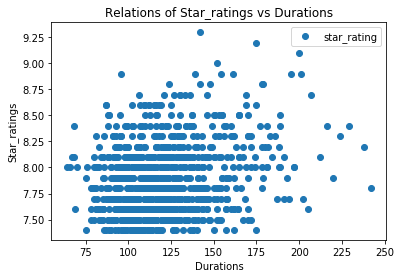

In [17]:
# Answer: Should have a pusedo strightline relationship
movies.plot(x='duration', y='star_rating', style='o')
plt.xlabel('Durations');
plt.ylabel('Star_ratings');
plt.title('Relations of Star_ratings vs Durations');

#### Calculate the average duration for each genre.

In [18]:
# Answer:
movies.genre.value_counts()
for gen in list(set(movies.genre)):
    print(gen, movies.duration[movies.genre == gen].mean())

Drama 126.53956834532374
History 66.0
Horror 102.51724137931035
Fantasy 112.0
Animation 96.59677419354838
Comedy 107.6025641025641
Action 126.48529411764706
Biography 131.84415584415584
Mystery 115.625
Crime 122.29838709677419
Thriller 114.2
Family 107.5
Adventure 134.84
Western 136.66666666666666
Sci-Fi 109.0
Film-Noir 97.33333333333333


## Advanced level

#### Visualize the relationship between content rating and duration.

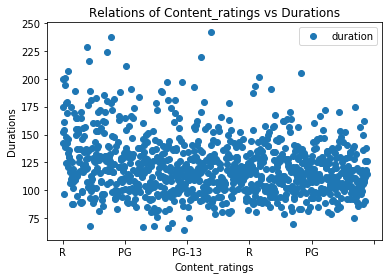

In [19]:
# Answer:
movies.plot(x='content_rating', y='duration', style='o')
plt.ylabel('Durations');
plt.xlabel('Content_ratings');
plt.title('Relations of Content_ratings vs Durations');

#### Determine the top rated movie (by star rating) for each genre.

In [20]:
# Answer:
for gen in list(set(movies.genre)):
    print(gen, movies.star_rating[movies.genre == gen].max())

Drama 8.9
History 8.0
Horror 8.6
Fantasy 7.7
Animation 8.6
Comedy 8.6
Action 9.0
Biography 8.9
Mystery 8.6
Crime 9.3
Thriller 8.0
Family 7.9
Adventure 8.9
Western 8.9
Sci-Fi 8.2
Film-Noir 8.3


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [21]:
# Answer: They are NOT real duplicates
movies.title.value_counts()
duplicates = ['True Grit','Les Miserables','The Girl with the Dragon Tattoo','Dracula']
movies[movies.title.isin(duplicates)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [22]:
# Answer:
genres = set(movies.genre)
for gen in genres:
    if (movies.genre == gen).sum() > 10: 
        print(gen, movies.star_rating[movies.genre == gen].mean())

Drama 7.902517985611515
Horror 7.8068965517241375
Animation 7.914516129032259
Comedy 7.82243589743591
Action 7.88455882352942
Biography 7.862337662337664
Mystery 7.975
Crime 7.916935483870971
Adventure 7.933333333333332


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [23]:
# Answer:
series = movies.genre.value_counts()
for gen in series.index:
    if series[gen] > 10: 
        print(gen, movies.star_rating[movies.genre == gen].mean())

Drama 7.902517985611515
Comedy 7.82243589743591
Action 7.88455882352942
Crime 7.916935483870971
Biography 7.862337662337664
Adventure 7.933333333333332
Animation 7.914516129032259
Horror 7.8068965517241375
Mystery 7.975


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [38]:
# Answer:
genres = set(movies.genre)

for gen in genres:
    result = (gen, movies.star_rating[movies.genre == gen].mean())
    boole = len(movies.star_rating[movies.genre == gen]) > 10
    if boole == True:
        print(result)
    

('Drama', 7.902517985611515)
('Horror', 7.8068965517241375)
('Animation', 7.914516129032259)
('Comedy', 7.82243589743591)
('Action', 7.88455882352942)
('Biography', 7.862337662337664)
('Mystery', 7.975)
('Crime', 7.916935483870971)
('Adventure', 7.933333333333332)


#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:
result1=movies.groupby('genre').star_rating.agg(['count', 'mean', 'min', 'max']).sort_values('mean')
result1[result1['count']>10]

## Bonus

#### Figure out something "interesting" using the actors data!

In [214]:
# find out which actor showed in the movies file most often
movies.actors_list[0]
actors = movies.actors_list.str.strip('[ ]').str.split(',')

for i in movies.index:
    actors[i] = [j.replace("u'", "").strip() for j in actors[i]]
    actors[i] = [j.replace("'", "").strip() for j in actors[i]]
actor = actors.sum()
# obtain list of non-duplicated actor names
actorss = list(set(actor))
for i in actorss:
    if actor.count(i) > 10:
        print(i, actor.count(i))
# there are total 1777 non duplicate actors showed up in the file
len(actorss)

Tom Hanks 14
Johnny Depp 12
Christian Bale 11
Robert De Niro 18
Brad Pitt 14
Leonardo DiCaprio 11
Clint Eastwood 14
Dustin Hoffman 11
Al Pacino 13


1777